In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 加载数据集

In [112]:
data_train = pd.read_csv(r'Dataset\train_feature.csv',sep=',')
data_train_label = pd.read_csv(r'Dataset\train_label.csv',sep=',')
data_test_feature = pd.read_csv(r'D:Dataset\test_feature.csv',sep=',')
print(data_train.info())
print(data_train_label.info())
print(data_test_feature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 120 entries, feature_0 to feature_119
dtypes: float64(120)
memory usage: 9.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 120 entries, feature_0 to feature_119
dtypes: float64(120)
memory usage: 2.7 MB
None


In [113]:
data_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
0,48.0,9.804220,0.064283,6.0,5.0,211.0,45.0,8.0,3.0,2.711200,...,4.0,1.157242,44.0,0.027881,1.122944,0.0,47.0,1.732584,2.0,52.0
1,45.0,-15.118262,0.590192,10.0,2.0,141.0,48.0,7.0,1.0,3.276093,...,4.0,0.583108,62.0,0.852767,4.685032,1.0,38.0,0.601408,2.0,44.0
2,56.0,1.691250,0.173249,8.0,1.0,251.0,47.0,6.0,1.0,1.082628,...,6.0,0.741096,62.0,0.907026,0.927391,2.0,53.0,2.129846,1.0,46.0
3,50.0,5.867626,0.004743,8.0,3.0,186.0,39.0,8.0,1.0,2.992557,...,5.0,1.173169,60.0,0.165119,7.096296,1.0,56.0,0.474665,2.0,38.0
4,49.0,-6.160454,0.709718,9.0,3.0,240.0,57.0,6.0,1.0,3.189316,...,5.0,1.068687,54.0,0.600518,4.988225,7.0,52.0,1.187483,2.0,NaN


In [114]:
data_train_label.head()

,label
0,0
1,0
2,0
3,2
4,2


## 数据清洗

AxesSubplot(0.125,0.125;0.775x0.755)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
count,9960.000000,9946.000000,9955.000000,9952.000000,9954.000000,9.955000e+03,9956.000000,9956.000000,9935.000000,9954.000000,...,9951.000000,9942.000000,9949.000000,9953.000000,9971.000000,9954.000000,9966.000000,9945.000000,9961.000000,9955.000000
mean,1381.896486,58.715384,11.157463,215.609224,104.244826,5.159948e+03,1418.185014,193.551326,49.467136,228.066855,...,116.686062,27.416274,1535.670218,15.054217,148.445119,59.534157,1492.845976,26.923894,53.122879,1608.872828
std,20342.092034,3067.018960,213.548216,3254.119426,1809.139214,8.325174e+04,21803.434424,3078.353897,1062.106891,4636.090534,...,1933.557182,562.969699,22002.428225,226.915755,3492.678496,1054.340669,22568.166582,570.147079,1009.911312,23191.540756
min,26.000000,-72400.900016,0.000004,3.000000,0.000000,0.000000e+00,27.000000,3.000000,1.000000,0.042353,...,0.000000,0.000128,27.000000,0.000122,0.051135,0.000000,24.000000,0.000010,0.000000,26.000000
25%,45.000000,-5.442525,0.248601,7.000000,3.000000,1.620000e+02,45.000000,7.000000,1.000000,1.390866,...,3.000000,0.289902,45.000000,0.255261,1.384008,1.000000,45.000000,0.294560,1.000000,45.000000
50%,50.000000,-0.060218,0.504924,8.000000,4.000000,1.940000e+02,50.000000,8.000000,2.000000,2.730417,...,4.000000,0.708386,50.000000,0.511428,2.789308,2.000000,50.000000,0.702308,2.000000,50.000000
75%,55.000000,5.482893,0.751965,8.000000,5.000000,2.220000e+02,55.000000,8.000000,4.000000,5.413222,...,5.000000,1.440402,55.000000,0.760929,5.354379,3.000000,54.000000,1.399526,3.000000,55.000000
max,526876.000000,105832.015208,8448.902842,79794.000000,57936.000000,2.072000e+06,505945.000000,81060.000000,47816.000000,210388.669161,...,66493.000000,29581.611161,514420.000000,6983.682765,195804.282475,49235.000000,632196.000000,23978.517876,40870.000000,564200.000000


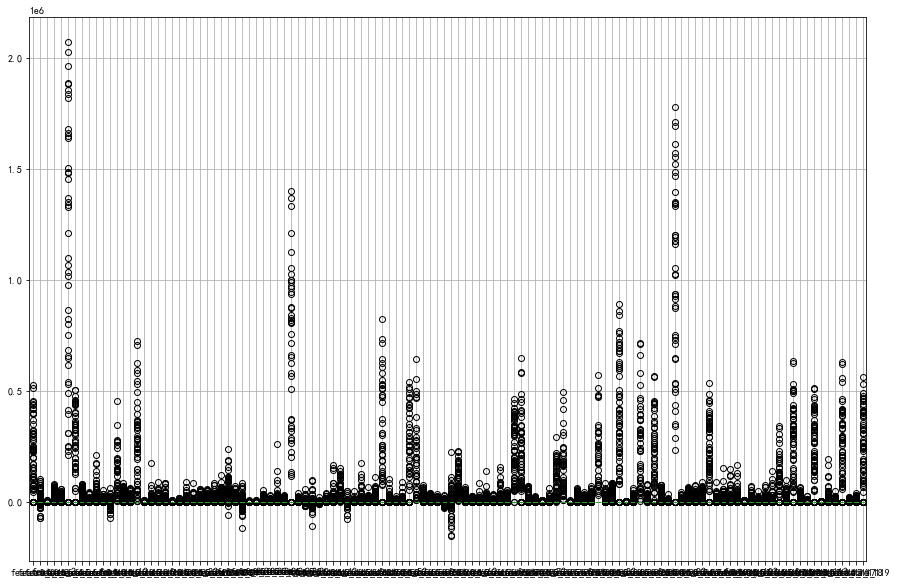

In [115]:
print(data_train.boxplot(figsize=[15,10]))
data_train.describe()

从上述有关数据集的信息可以看出，该数据集中存在异常值以及缺失值，我们先进行异常值的处理（后续缺失值填充可能受异常值的影响）。

### 异常值处理

我们假设数据服从正态分布，下面进行Kolmogorov–Smirnov检验来判断假设是否正确。

In [116]:
from scipy.stats import kstest

flag = 1
for col in data_train.columns:
    if kstest(data_train[data_train[col].isnull()==False][col],cdf = "norm").pvalue > 0.05:
        # 在kstest api中，p_value 小于0.05代表可以视为其服从正态分布
        print(col,' 不服从正态分布,p_value=',kstest(data_train[data_train[col].isnull()==False][col],cdf = "norm").pvalue ,'\n')
        flag = 0
if flag:
    print("全部特征服从正态分布\n")

feature_41  不服从正态分布,p_value= 0.2665972004397823 



可见全部特征中仅有feature_41不服从正态分布，而其他特征均可以视为服从正态分布，而feature_41也有73%的置信度服从正态分布，所以为了处理方便，将所有特征均视为服从正态分布。

由上述假设检验可知，数据服从正态分布，所以利用 **$3\sigma$ 原则**来判断离群点。

In [117]:
df_zscore=data_train.copy()
cols=data_train.columns
for col in cols:
    df_col = data_train[col]
    z_score = (df_col - df_col.mean()) / df_col.std()
    df_zscore[col] = z_score.abs() > 2 # 选择2sigma以外的作为离群点 数值分布在该范围内的概率为0.9545
df_zscore

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


我们可以将异常值替换为NaN，交给之后的缺失值处理步骤来处理。

In [118]:
for col in cols:
    for i in range(len(df_zscore[col])):
        if df_zscore[col][i] == True:
            data_train.loc[i,col] = np.nan
data_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
count,9904.000000,9909.000000,9916.000000,9903.000000,9911.000000,9910.000000,9910.000000,9911.000000,9903.000000,9915.000000,...,9902.000000,9903.000000,9894.000000,9901.000000,9936.000000,9911.000000,9914.000000,9909.000000,9922.000000,9901.000000
mean,50.048364,-0.995111,0.569607,7.518126,4.590051,190.315348,50.049041,7.494602,3.508533,12.474904,...,4.365684,1.710562,50.061957,0.641062,10.133922,2.126526,49.863930,1.464105,2.471175,54.658014
std,6.900805,106.492474,4.238610,1.405349,43.639399,39.885104,6.857621,1.391101,33.221582,223.787993,...,26.669238,22.606381,6.910227,6.783782,163.845437,11.426964,6.893707,17.428460,27.366942,464.336309
min,26.000000,-5410.199204,0.000004,3.000000,0.000000,0.000000,27.000000,3.000000,1.000000,0.042353,...,0.000000,0.000128,27.000000,0.000122,0.051135,0.000000,24.000000,0.000010,0.000000,26.000000
25%,45.000000,-5.427647,0.247256,7.000000,3.000000,162.000000,45.000000,7.000000,1.000000,1.386359,...,3.000000,0.288516,45.000000,0.253967,1.377840,1.000000,45.000000,0.293506,1.000000,45.000000
50%,50.000000,-0.062747,0.503666,8.000000,4.000000,193.000000,50.000000,7.000000,2.000000,2.720510,...,4.000000,0.703961,50.000000,0.509296,2.773578,2.000000,50.000000,0.697016,2.000000,50.000000
75%,55.000000,5.435975,0.749707,8.000000,5.000000,222.000000,55.000000,8.000000,4.000000,5.373458,...,5.000000,1.428427,55.000000,0.758050,5.302120,3.000000,54.000000,1.390066,3.000000,55.000000
max,78.000000,4489.011118,362.031222,12.000000,3336.000000,303.000000,80.000000,13.000000,2081.000000,9308.439419,...,2006.000000,1103.033262,76.000000,439.539327,6791.040122,1131.000000,78.000000,842.912027,1999.000000,46248.000000


<AxesSubplot:>

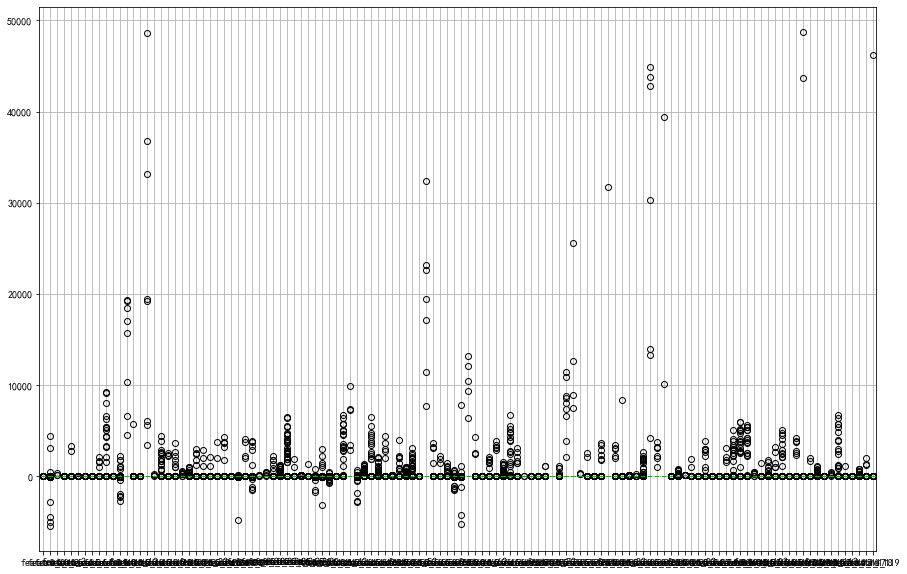

In [119]:
data_train.boxplot(figsize=[15,10])

### 缺失值处理

In [120]:
data_train.isnull().sum()

feature_0      96
feature_1      91
feature_2      84
feature_3      97
feature_4      89
               ..
feature_115    89
feature_116    86
feature_117    91
feature_118    78
feature_119    99
Length: 120, dtype: int64

可以看出，在数据中有很多的缺失值，在观察数据后发现数据均为连续型，所以决定用均值填充缺失值。

In [121]:
data_train.fillna(data_train.mean(skipna=True),inplace=True)
data_train.isnull().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
              ..
feature_115    0
feature_116    0
feature_117    0
feature_118    0
feature_119    0
Length: 120, dtype: int64

In [122]:
data_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.048364,-0.995111,0.569607,7.518126,4.590051,190.315348,50.049041,7.494602,3.508533,12.474904,...,4.365684,1.710562,50.061957,0.641062,10.133922,2.126526,49.863930,1.464105,2.471175,54.658014
std,6.867598,106.006777,4.220769,1.398515,43.444750,39.705197,6.826689,1.384896,33.060048,222.834769,...,26.538224,22.496462,6.873502,6.750116,163.320237,11.375996,6.863997,17.348972,27.259991,462.031896
min,26.000000,-5410.199204,0.000004,3.000000,0.000000,0.000000,27.000000,3.000000,1.000000,0.042353,...,0.000000,0.000128,27.000000,0.000122,0.051135,0.000000,24.000000,0.000010,0.000000,26.000000
25%,45.000000,-5.391720,0.250275,7.000000,3.000000,163.000000,45.000000,7.000000,1.000000,1.399595,...,3.000000,0.292109,45.000000,0.256779,1.386336,1.000000,45.000000,0.296805,1.000000,45.000000
50%,50.000000,-0.153550,0.507526,7.518126,4.000000,193.000000,50.000000,7.494602,2.000000,2.747632,...,4.000000,0.712883,50.000000,0.513001,2.799828,2.000000,50.000000,0.708050,2.000000,50.000000
75%,55.000000,5.385489,0.747355,8.000000,5.000000,221.000000,54.000000,8.000000,4.000000,5.474437,...,5.000000,1.458942,55.000000,0.755718,5.393057,3.000000,54.000000,1.419233,3.000000,54.658014
max,78.000000,4489.011118,362.031222,12.000000,3336.000000,303.000000,80.000000,13.000000,2081.000000,9308.439419,...,2006.000000,1103.033262,76.000000,439.539327,6791.040122,1131.000000,78.000000,842.912027,1999.000000,46248.000000


填充成功，下面进行重复值的处理

### 重复值处理

In [123]:
data_train.duplicated().sum()

0

可见无重复值，无需处理。

## 数据变换

### 标准化

采用**Z-score法**进行数据的标准化，公式为 $x_{new}=\frac{x-\bar x}{\sigma}$

In [124]:
cols=data_train.columns
for col in cols:
    df_col = data_train[col]
    z_score = (df_col - df_col.mean()) / df_col.std()
    data_train[col] = z_score
data_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-9.798384e-16,1.065814e-18,-1.634248e-17,-2.852829e-16,2.131628e-18,5.407230e-16,-2.692957e-16,-8.554935e-16,2.415845e-17,-5.684342e-18,...,8.526513e-18,7.105427e-18,2.906120e-16,1.065814e-17,-1.492140e-17,-8.526513e-18,-1.847411e-16,2.842171e-18,-1.705303e-17,5.684342e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.501714e+00,-5.102696e+01,-1.349523e-01,-3.230659e+00,-1.056526e-01,-4.793210e+00,-3.376314e+00,-3.245443e+00,-7.587807e-02,-5.579269e-02,...,-1.645055e-01,-7.603128e-02,-3.355198e+00,-9.495250e-02,-6.173630e-02,-1.869310e-01,-3.768057e+00,-8.439089e-02,-9.065209e-02,-6.202605e-02
25%,-7.350990e-01,-4.147479e-02,-7.565719e-02,-3.704828e-01,-3.659939e-02,-6.879540e-01,-7.396033e-01,-3.571401e-01,-7.587807e-02,-4.970189e-02,...,-5.146101e-02,-6.305230e-02,-7.364451e-01,-5.692990e-02,-5.356095e-02,-9.902659e-02,-7.086148e-01,-6.728354e-02,-5.396829e-02,-2.090335e-02
50%,-7.042389e-03,7.938749e-03,-1.470827e-02,0.000000e+00,-1.358165e-02,6.761462e-02,-7.183772e-03,-6.413321e-16,-4.563008e-02,-4.365240e-02,...,-1.377951e-02,-4.434827e-02,-9.013854e-03,-1.897177e-02,-4.490622e-02,-1.112220e-02,1.982376e-02,-4.357924e-02,-1.728449e-02,-1.008159e-02
75%,7.210142e-01,6.019049e-02,4.211286e-02,3.445612e-01,9.436089e-03,7.728120e-01,5.787518e-01,3.649356e-01,1.486590e-02,-3.141551e-02,...,2.390199e-02,-1.118489e-02,7.184174e-01,1.698578e-02,-2.902804e-02,7.678220e-02,6.025746e-01,-2.586450e-03,1.939930e-02,0.000000e+00
max,4.070075e+00,4.235584e+01,8.563881e+01,3.204737e+00,7.668153e+01,2.838033e+00,4.387333e+00,3.975314e+00,6.283994e+01,4.171685e+01,...,7.542458e+01,4.895537e+01,3.773629e+00,6.502085e+01,4.151908e+01,9.923294e+01,4.099080e+00,4.850131e+01,7.324026e+01,9.997869e+01


### 特征选择

首先检验数据的线性相关性：

In [125]:
x,y=np.where(data_train.corr().values>0.6)
index=[]
for i in range(len(x)):
    if x[i]==y[i]:
        continue
    else:
        if set([x[i],y[i]]) not in index:
            index.append(set([x[i],y[i]]))
index

[{5, 69},
 {5, 73},
 {5, 92},
 {37, 84},
 {50, 69},
 {50, 73},
 {50, 92},
 {69, 73},
 {69, 92},
 {73, 92}]

可见上述特征具有较强的相关性，选择留下线性相关属性中的一个，即删除feature 69，73，92，84。

In [126]:
data_train.drop(columns=['feature_69','feature_73','feature_84','feature_92'],inplace=True)
data_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
0,-0.298265,0.101874,-0.119723,-1.085527,0.009436,0.520956,-0.739603,0.364936,-0.015382,-0.043816,...,-0.013780,-0.024596,-0.881931,-0.090840,-0.055174,-0.186931,-0.417239,0.015475,-0.017284,-0.005753
1,-0.735099,-0.133229,0.004877,1.774649,-0.059617,-1.242038,-0.300152,-0.357140,-0.075878,-0.041281,...,-0.013780,-0.050117,1.736821,0.031363,-0.033363,-0.099027,-1.728429,-0.049726,-0.017284,-0.023068
2,0.866626,0.025341,-0.093907,0.344561,-0.082635,1.528381,-0.446635,-1.079216,-0.075878,-0.051124,...,0.061583,-0.043094,1.736821,0.039401,-0.056371,-0.011122,0.456887,0.038374,-0.053968,-0.018739
3,-0.007042,0.064739,-0.133830,0.344561,-0.036599,-0.108685,-1.618507,0.364936,-0.075878,-0.042553,...,0.023902,-0.023888,1.445849,-0.070509,-0.018599,-0.099027,0.893950,-0.057032,-0.017284,-0.036054
4,-0.152654,-0.048727,0.033196,1.059605,-0.036599,1.251339,1.018204,-1.079216,-0.075878,-0.041670,...,0.023902,-0.028532,0.572931,-0.006006,-0.031507,0.428400,0.311199,-0.015945,-0.017284,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.468350,0.021453,-0.100853,1.774649,-0.036599,0.495770,0.139300,0.364936,-0.075878,-0.052974,...,0.212309,-0.012231,-0.009014,-0.004975,-0.053916,0.164687,-0.125864,-0.043596,-0.053968,-0.005753
9996,0.866626,0.054803,0.030219,-1.085527,0.032454,1.931350,-0.886087,1.087011,-0.045630,-0.053376,...,-0.089143,-0.061150,1.882307,-0.059735,-0.054580,-0.099027,0.748262,-0.052385,0.056083,-0.005753
9997,1.012237,0.006829,0.002368,0.344561,0.009436,-0.562026,1.018204,0.364936,0.045114,0.008041,...,0.061583,-0.015307,-0.736445,-0.022149,-0.053304,-0.011122,1.331013,0.005825,-0.017284,-0.029561
9998,0.284180,-0.000256,0.064002,0.344561,-0.082635,1.301710,-1.911475,1.809087,-0.015382,-0.052860,...,0.023902,-0.051058,0.718417,-0.019672,-0.042988,-0.099027,0.000000,-0.042474,0.019399,0.022384


利用F检验选择前30个得分高的特征，达到降维的目的

In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

SKB = SelectKBest(f_regression,k=30)
SKB.fit(data_train, data_train_label.values.flatten())
# print(np.sort(SKB.scores_))
cols_index=[]
for i in np.where(SKB.get_support()==True)[0]:
    cols_index.append(i)
data_train = data_train.values[:,cols_index]
data_train

array([[ 0.00943609, -0.01538209, -0.04381589, ..., -0.02196745,
        -0.01377951, -0.00575288],
       [-0.05961713, -0.07587807, -0.04128086, ..., -0.02502608,
        -0.01377951, -0.0230677 ],
       [-0.08263487, -0.07587807, -0.05112432, ..., -0.02043814,
         0.06158349, -0.018739  ],
       ...,
       [ 0.00943609,  0.04511389,  0.00804077, ..., -0.01126224,
         0.06158349, -0.02956076],
       [-0.08263487, -0.01538209, -0.05286012, ..., -0.03114335,
         0.02390199,  0.02238371],
       [-0.01358165, -0.07587807, -0.04050111, ..., -0.02196745,
         0.02390199, -0.00142418]])

## 数据集划分

采用5折交叉验证

In [19]:
from sklearn.model_selection import KFold

x = np.arange(len(data_train))
kf = KFold(n_splits=5,shuffle=True)
for train_index, test_index in kf.split(x):
    print(train_index,test_index)

[   0    1    3 ... 9997 9998 9999] [   2   19   30 ... 9992 9993 9996]
[   0    1    2 ... 9996 9998 9999] [   3    6   16 ... 9985 9991 9997]
[   0    2    3 ... 9997 9998 9999] [   1    7    9 ... 9978 9983 9986]
[   0    1    2 ... 9995 9996 9997] [   8   10   12 ... 9994 9998 9999]
[   1    2    3 ... 9997 9998 9999] [   0    4    5 ... 9970 9988 9995]


In [20]:
for train_index, test_index in kf.split(x):
    X_train ,Y_train = data_train[train_index] ,data_train_label.values[train_index]
    X_test ,Y_test = data_train[test_index] ,data_train_label.values[test_index]

## 模型训练

In [21]:
data_train_label.groupby(['label']).sum()

""
label
0
1
2
3


由上面的结果可看出该数据类别有4个，是多分类问题。采用OvO方法解决。首先将数据按照类别划分,然后对于每两个集合训练一个分类器，最后使用投票法确定类别。

In [22]:
X_train0 = X_train[np.where(Y_train==0)[0]]
X_train1 = X_train[np.where(Y_train==1)[0]]
X_train2 = X_train[np.where(Y_train==2)[0]]
X_train3 = X_train[np.where(Y_train==3)[0]]
X_Train = [X_train0,X_train1,X_train2,X_train3]
OvO={'0':[0,1],'1':[0,2],'2':[0,3],'3':[1,2],'4':[1,3],'5':[2,3]}

### 线性回归模型（逻辑回归）

对于正则化系数gamma进行调参

In [73]:
from Model import LogisticRegression # Model是之前实验的代码集
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

gammas=[0.001,0.01,0.1,1,5,10,100]
for gamma in gammas:
    lrs=[]
    for i in range(len(X_Train)):
        for j in range(i+1,len(X_Train),1):
            lr=LogisticRegression(gamma=gamma)
            lr.fit(np.concatenate([X_Train[i],X_Train[j]]),np.mat(np.concatenate([np.zeros([len(X_Train[i]),1]),np.ones([len(X_Train[j]),1])])),lr=1)
            lrs.append(lr)

    Pred=np.zeros([len(X_test),len(lrs)],dtype=int)
    for i in range(len(lrs)):
        pred=lrs[i].predict(X_test).astype(int)
        for j in range(len(pred)):
            Pred[j][i]=OvO[str(i)][pred[j][0]]

    Y_pred = []
    for i in range(len(Pred)):
        Y_pred.append(np.argmax(np.bincount(Pred[i]))) # 投票法

    print('gamma='+str(gamma),'accuracy=',accuracy_score(Y_test, Y_pred),'micro-F1=',f1_score(Y_test, Y_pred, average='micro'))

gamma=0.001 accuracy= 0.2595 micro-F1= 0.2595
gamma=0.01 accuracy= 0.2585 micro-F1= 0.2585
gamma=0.1 accuracy= 0.2585 micro-F1= 0.2585
gamma=1 accuracy= 0.2595 micro-F1= 0.2595
gamma=5 accuracy= 0.261 micro-F1= 0.261
gamma=10 accuracy= 0.258 micro-F1= 0.258
gamma=100 accuracy= 0.249 micro-F1= 0.249


In [76]:
from Model import LogisticRegression # Model是之前实验的代码集
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc=[]
micro=[]

for train_index, test_index in kf.split(x):
    X_train ,Y_train = data_train[train_index] ,data_train_label.values[train_index]
    X_test ,Y_test = data_train[test_index] ,data_train_label.values[test_index]
    X_train0 = X_train[np.where(Y_train==0)[0]]
    X_train1 = X_train[np.where(Y_train==1)[0]]
    X_train2 = X_train[np.where(Y_train==2)[0]]
    X_train3 = X_train[np.where(Y_train==3)[0]]
    X_Train = [X_train0,X_train1,X_train2,X_train3]
    OvO={'0':[0,1],'1':[0,2],'2':[0,3],'3':[1,2],'4':[1,3],'5':[2,3]}

    lrs=[]
    for i in range(len(X_Train)):
        for j in range(i+1,len(X_Train),1):
            lr=LogisticRegression(gamma=5)
            lr.fit(np.concatenate([X_Train[i],X_Train[j]]),np.mat(np.concatenate([np.zeros([len(X_Train[i]),1]),np.ones([len(X_Train[j]),1])])),lr=1)
            lrs.append(lr)

    Pred=np.zeros([len(X_test),len(lrs)],dtype=int)
    for i in range(len(lrs)):
        pred=lrs[i].predict(X_test).astype(int)
        for j in range(len(pred)):
            Pred[j][i]=OvO[str(i)][pred[j][0]]

    Y_pred = []
    for i in range(len(Pred)):
        Y_pred.append(np.argmax(np.bincount(Pred[i]))) # 投票法

    acc.append(accuracy_score(Y_test, Y_pred))
    micro.append(f1_score(Y_test, Y_pred, average='micro'))

print("逻辑回归")
print("5折交叉验证accuracy:",acc)
print("average accuracy:",np.array(acc).sum()/len(acc))
print("5折交叉验证micro-F1:",micro)
print("average micro-F1:",np.array(micro).sum()/len(micro))

逻辑回归
5折交叉验证accuracy: [0.236, 0.268, 0.2465, 0.2545, 0.2445]
average accuracy: 0.24989999999999996
5折交叉验证micro-F1: [0.236, 0.268, 0.2465, 0.2545, 0.2445]
average micro-F1: 0.24989999999999996


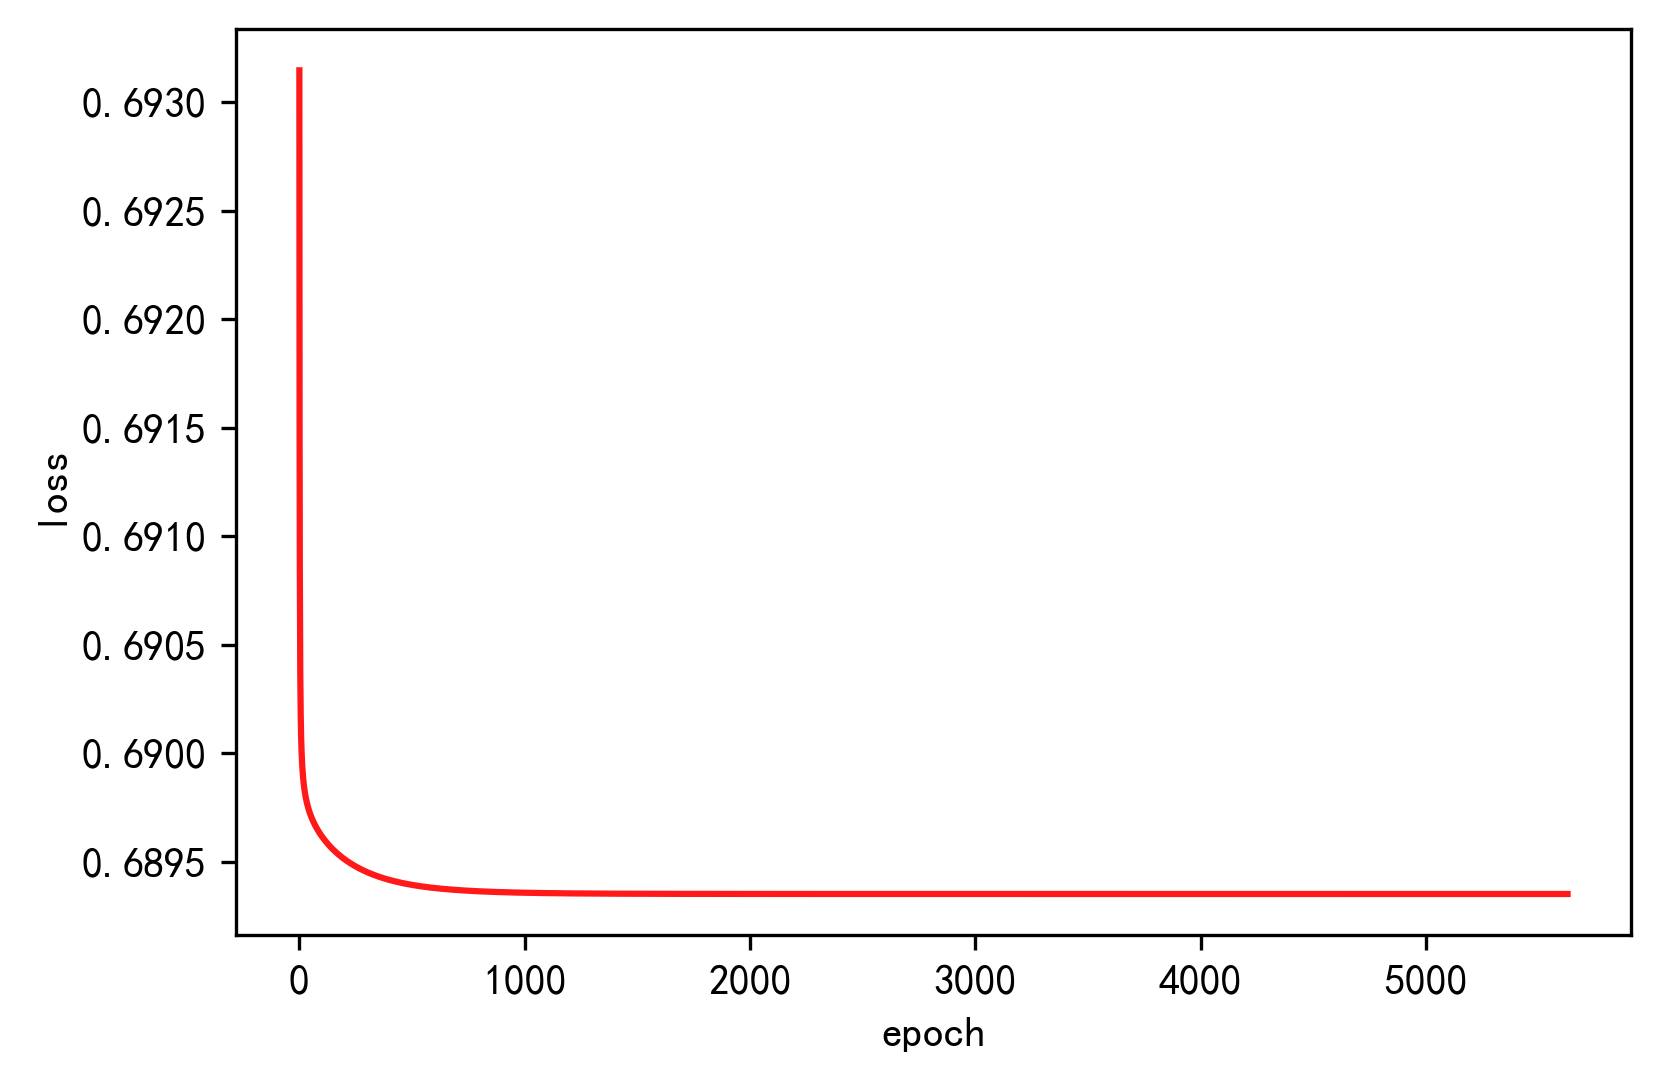

In [77]:
lr.ShowLoss()

### 支持向量机

#### DCD算法

调参 $\lambda=\frac{1}{C}$ ，C 的值越小，$\lambda$ 的值越大，容忍样本不满足约束条件的能力越强，软间隔程度越大，对 $\lambda$ 进行调参：

In [78]:
from Model import SVM1 # Model是之前实验的代码集
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Cs=[0.001,0.01,0.1,1,10,100]
for C in Cs:
    svm1s=[]
    for i in range(len(X_Train)):
        for j in range(i+1,len(X_Train),1):
            svm1=SVM1(dim=X_train.shape,C=C)
            svm1.fit(np.concatenate([X_Train[i],X_Train[j]]),np.concatenate([np.zeros([len(X_Train[i]),1])-1,np.ones([len(X_Train[j]),1])]),max_iter=50)
            svm1s.append(svm1)
            
    Pred=np.zeros([len(X_test),len(svm1s)],dtype=int)
    for i in range(len(svm1s)):
        pred=svm1s[i].predict(X_test).astype(int)
        for k in range(len(pred)):
            if pred[k]==-1:
                pred[k]=0
        
        for j in range(len(pred)):
            Pred[j][i]=OvO[str(i)][pred[j][0]]

    Y_pred = []
    for i in range(len(Pred)):
        Y_pred.append(np.argmax(np.bincount(Pred[i]))) # 投票法

    print('1/C='+str(C),'accuracy=',accuracy_score(Y_test, Y_pred),'micro-F1=',f1_score(Y_test, Y_pred, average='micro'))

1/C=0.001 accuracy= 0.2535 micro-F1= 0.2535
1/C=0.01 accuracy= 0.253 micro-F1= 0.253
1/C=0.1 accuracy= 0.2525 micro-F1= 0.2525
1/C=1 accuracy= 0.2525 micro-F1= 0.2525
1/C=10 accuracy= 0.2525 micro-F1= 0.2525
1/C=100 accuracy= 0.244 micro-F1= 0.244


$\lambda=0.001$ 效果最好

In [82]:
from Model import SVM1 # Model是之前实验的代码集
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc=[]
micro=[]

for train_index, test_index in kf.split(x):
    X_train ,Y_train = data_train[train_index] ,data_train_label.values[train_index]
    X_test ,Y_test = data_train[test_index] ,data_train_label.values[test_index]
    X_train0 = X_train[np.where(Y_train==0)[0]]
    X_train1 = X_train[np.where(Y_train==1)[0]]
    X_train2 = X_train[np.where(Y_train==2)[0]]
    X_train3 = X_train[np.where(Y_train==3)[0]]
    X_Train = [X_train0,X_train1,X_train2,X_train3]
    OvO={'0':[0,1],'1':[0,2],'2':[0,3],'3':[1,2],'4':[1,3],'5':[2,3]}
    
    svm1s=[]
    for i in range(len(X_Train)):
        for j in range(i+1,len(X_Train),1):
            svm1=SVM1(dim=X_train.shape,C=0.001)
            svm1.fit(np.concatenate([X_Train[i],X_Train[j]]),np.concatenate([np.zeros([len(X_Train[i]),1])-1,np.ones([len(X_Train[j]),1])]),max_iter=50)
            svm1s.append(svm1)
            
    Pred=np.zeros([len(X_test),len(svm1s)],dtype=int)
    for i in range(len(svm1s)):
        pred=svm1s[i].predict(X_test).astype(int)
        for k in range(len(pred)):
            if pred[k]==-1:
                pred[k]=0
        
        for j in range(len(pred)):
            Pred[j][i]=OvO[str(i)][pred[j][0]]

    Y_pred = []
    for i in range(len(Pred)):
        Y_pred.append(np.argmax(np.bincount(Pred[i]))) # 投票法

    acc.append(accuracy_score(Y_test, Y_pred))
    micro.append(f1_score(Y_test, Y_pred, average='micro'))

print("SVM DCD 算法")
print("5折交叉验证accuracy:",acc)
print("average accuracy:",np.array(acc).sum()/len(acc))
print("5折交叉验证micro-F1:",micro)
print("average micro-F1:",np.array(micro).sum()/len(micro))

SVM DCD 算法
5折交叉验证accuracy: [0.2415, 0.237, 0.249, 0.2515, 0.2515]
average accuracy: 0.24610000000000004
5折交叉验证micro-F1: [0.2415, 0.237, 0.249, 0.2515, 0.2515]
average micro-F1: 0.24610000000000004


### Pegasos 算法

同上对参数 C进行调参：

In [81]:
from Model import SVM2 # Model是之前实验的代码集
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Cs=[0.001,0.01,0.1,1,10,100]
for C in Cs:
    svm2s=[]
    for i in range(len(X_Train)):
        for j in range(i+1,len(X_Train),1):
            svm2=SVM2(dim=X_train.shape,C=C)
            svm2.fit(np.concatenate([X_Train[i],X_Train[j]]),np.concatenate([np.zeros([len(X_Train[i]),1])-1,np.ones([len(X_Train[j]),1])]),max_iter=1e5)
            svm2s.append(svm2)
            
    Pred=np.zeros([len(X_test),len(svm2s)],dtype=int)
    for i in range(len(svm2s)):
        pred=svm2s[i].predict(X_test).astype(int)
        for k in range(len(pred)):
            if pred[k]==-1:
                pred[k]=0
        
        for j in range(len(pred)):
            Pred[j][i]=OvO[str(i)][pred[j]]

    Y_pred = []
    for i in range(len(Pred)):
        Y_pred.append(np.argmax(np.bincount(Pred[i]))) # 投票法

    print('C='+str(C),'accuracy=',accuracy_score(Y_test, Y_pred),'micro-F1=',f1_score(Y_test, Y_pred, average='micro'))

C=0.001 accuracy= 0.248 micro-F1= 0.248
C=0.01 accuracy= 0.248 micro-F1= 0.248
C=0.1 accuracy= 0.253 micro-F1= 0.253
C=1 accuracy= 0.253 micro-F1= 0.253
C=10 accuracy= 0.2515 micro-F1= 0.2515
C=100 accuracy= 0.2525 micro-F1= 0.2525


$C=1$ 效果最好

In [83]:
from Model import SVM2 # Model是之前实验的代码集
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


acc=[]
micro=[]

for train_index, test_index in kf.split(x):
    X_train ,Y_train = data_train[train_index] ,data_train_label.values[train_index]
    X_test ,Y_test = data_train[test_index] ,data_train_label.values[test_index]
    X_train0 = X_train[np.where(Y_train==0)[0]]
    X_train1 = X_train[np.where(Y_train==1)[0]]
    X_train2 = X_train[np.where(Y_train==2)[0]]
    X_train3 = X_train[np.where(Y_train==3)[0]]
    X_Train = [X_train0,X_train1,X_train2,X_train3]
    OvO={'0':[0,1],'1':[0,2],'2':[0,3],'3':[1,2],'4':[1,3],'5':[2,3]}
    
    svm2s=[]
    for i in range(len(X_Train)):
        for j in range(i+1,len(X_Train),1):
            svm2=SVM2(dim=X_train.shape,C=1)
            svm2.fit(np.concatenate([X_Train[i],X_Train[j]]),np.concatenate([np.zeros([len(X_Train[i]),1])-1,np.ones([len(X_Train[j]),1])]),max_iter=1e5)
            svm2s.append(svm2)
            
    Pred=np.zeros([len(X_test),len(svm2s)],dtype=int)
    for i in range(len(svm2s)):
        pred=svm2s[i].predict(X_test).astype(int)
        for k in range(len(pred)):
            if pred[k]==-1:
                pred[k]=0
        
        for j in range(len(pred)):
            Pred[j][i]=OvO[str(i)][pred[j]]

    Y_pred = []
    for i in range(len(Pred)):
        Y_pred.append(np.argmax(np.bincount(Pred[i]))) # 投票法

    acc.append(accuracy_score(Y_test, Y_pred))
    micro.append(f1_score(Y_test, Y_pred, average='micro'))

print("SVM Pegasos 算法")
print("5折交叉验证accuracy:",acc)
print("average accuracy:",np.array(acc).sum()/len(acc))
print("5折交叉验证micro-F1:",micro)
print("average micro-F1:",np.array(micro).sum()/len(micro))

SVM Pegasos 算法
5折交叉验证accuracy: [0.263, 0.2475, 0.254, 0.256, 0.2375]
average accuracy: 0.2516
5折交叉验证micro-F1: [0.263, 0.2475, 0.254, 0.256, 0.23750000000000002]
average micro-F1: 0.2516


### 决策树模型

这里采取的是CART决策树。

可调参数有:
- max_depth：决策树最大深度
- min_samples_leaf：叶子节点（即分类）最少样本数

而min_samples_leaf将其设为数据量的1%，所以只需要对于max_depth：决策树最大深度进行调参

max_depth=1 accuracy= 0.2575 micro-F1= 0.2575
max_depth=2 accuracy= 0.2645 micro-F1= 0.2645
max_depth=3 accuracy= 0.26 micro-F1= 0.26
max_depth=4 accuracy= 0.265 micro-F1= 0.265
max_depth=5 accuracy= 0.264 micro-F1= 0.264
max_depth=6 accuracy= 0.265 micro-F1= 0.265
max_depth=7 accuracy= 0.2695 micro-F1= 0.2695
max_depth=8 accuracy= 0.26 micro-F1= 0.26
max_depth=9 accuracy= 0.2455 micro-F1= 0.2455
max_depth=10 accuracy= 0.248 micro-F1= 0.248
max_depth=11 accuracy= 0.2465 micro-F1= 0.2465
max_depth=12 accuracy= 0.2545 micro-F1= 0.2545
max_depth=13 accuracy= 0.2515 micro-F1= 0.2515
max_depth=14 accuracy= 0.2445 micro-F1= 0.2445
max_depth=15 accuracy= 0.2465 micro-F1= 0.2465
max_depth=16 accuracy= 0.249 micro-F1= 0.249
max_depth=17 accuracy= 0.2455 micro-F1= 0.2455
max_depth=18 accuracy= 0.2455 micro-F1= 0.2455
max_depth=19 accuracy= 0.2465 micro-F1= 0.2465
max_depth=20 accuracy= 0.2465 micro-F1= 0.2465
max_depth=21 accuracy= 0.2465 micro-F1= 0.2465
max_depth=22 accuracy= 0.2465 micro-F1= 

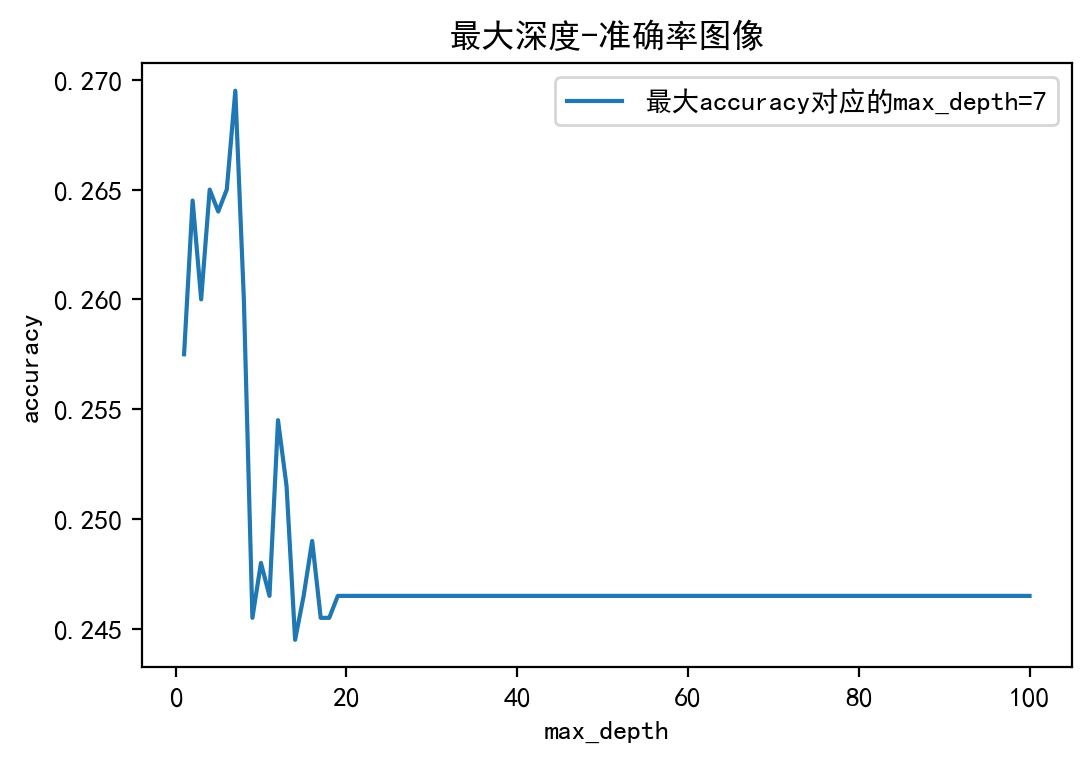

In [100]:
from sklearn import tree
from sklearn.metrics import f1_score

acc=[]
for depth in range(1,101,1):
    tree_model = tree.DecisionTreeClassifier(criterion='gini', 
                                            max_depth=depth,
                                            min_samples_leaf=0.01)
    tree_model.fit(X_train, Y_train.flatten())
    Y_pred=tree_model.predict(X_test)
    print('max_depth='+str(depth),'accuracy=',accuracy_score(Y_test, Y_pred),'micro-F1=',f1_score(Y_test, Y_pred, average='micro'))
    acc.append(accuracy_score(Y_test, Y_pred))
best_depth=np.argmax(np.array(acc))+1
plt.figure(dpi=200)
plt.plot(list(range(1,101,1)),acc,label='最大accuracy对应的max_depth='+str(best_depth))
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("最大深度-准确率图像")
plt.legend()
plt.show()

In [113]:
from sklearn import tree
from sklearn.metrics import f1_score


acc=[]
micro=[]
for train_index, test_index in kf.split(x):
    X_train ,Y_train = data_train[train_index] ,data_train_label.values[train_index]
    X_test ,Y_test = data_train[test_index] ,data_train_label.values[test_index]
    tree_model = tree.DecisionTreeClassifier(criterion='gini', 
                                            max_depth=7,
                                            min_samples_leaf=0.01)
    tree_model.fit(X_train, Y_train.flatten())
    Y_pred=tree_model.predict(X_test)
    acc.append(tree_model.score(X_test,Y_test.flatten()))
    micro.append(f1_score(Y_test, Y_pred, average='micro'))

print("决策树")
print("5折交叉验证accuracy:",acc)
print("average accuracy:",np.array(acc).sum()/len(acc))
print("5折交叉验证micro-F1:",micro)
print("average micro-F1:",np.array(micro).sum()/len(micro))

决策树
5折交叉验证accuracy: [0.2685, 0.2415, 0.253, 0.2545, 0.265]
average accuracy: 0.25650000000000006
5折交叉验证micro-F1: [0.2685, 0.2415, 0.253, 0.2545, 0.265]
average micro-F1: 0.25650000000000006


### 神经网络

神经网络使用的是`sklearn.neural_network`中的`MLPClassifier`,solver参数选取的为 adam，adam在相对较大的数据集上效果比较好，所以采用该方法；激活函数选取的是relu函数，它可以弥补sigmoid函数和tanh函数的缺陷：克服梯度消失的问题、加快训练速度；那么可调的参数为**隐藏层的层数**和**每一层神经元的个数**。

而在教材P105说到：[Hornik et al.,1989]证明，只需要一个包含足够多神经元的隐层，多层前馈神经网络就能以任意精度逼近任意复杂度的连续函数。然而，如何设置隐层神经元的个数仍是个未决问题，实际中通常靠试错法（trail-by-error）调整。即我们只需要设置一层隐藏层，对神经元个数进行调参。

神经元个数=5 accuracy= 0.2435 micro-F1= 0.2435
神经元个数=6 accuracy= 0.2495 micro-F1= 0.2495
神经元个数=7 accuracy= 0.2495 micro-F1= 0.2495
神经元个数=8 accuracy= 0.2615 micro-F1= 0.2615
神经元个数=9 accuracy= 0.27 micro-F1= 0.27
神经元个数=10 accuracy= 0.2655 micro-F1= 0.2655
神经元个数=11 accuracy= 0.2625 micro-F1= 0.2625
神经元个数=12 accuracy= 0.254 micro-F1= 0.254
神经元个数=13 accuracy= 0.2485 micro-F1= 0.2485
神经元个数=14 accuracy= 0.2395 micro-F1= 0.2395
神经元个数=15 accuracy= 0.2575 micro-F1= 0.2575
神经元个数=16 accuracy= 0.2495 micro-F1= 0.2495
神经元个数=17 accuracy= 0.2535 micro-F1= 0.2535
神经元个数=18 accuracy= 0.2445 micro-F1= 0.2445
神经元个数=19 accuracy= 0.2435 micro-F1= 0.2435
神经元个数=20 accuracy= 0.246 micro-F1= 0.246
神经元个数=21 accuracy= 0.2305 micro-F1= 0.2305
神经元个数=22 accuracy= 0.237 micro-F1= 0.237
神经元个数=23 accuracy= 0.2395 micro-F1= 0.2395
神经元个数=24 accuracy= 0.2495 micro-F1= 0.2495
神经元个数=25 accuracy= 0.229 micro-F1= 0.229
神经元个数=26 accuracy= 0.256 micro-F1= 0.256
神经元个数=27 accuracy= 0.262 micro-F1= 0.262
神经元个数=28 accuracy= 0.2445 micro-

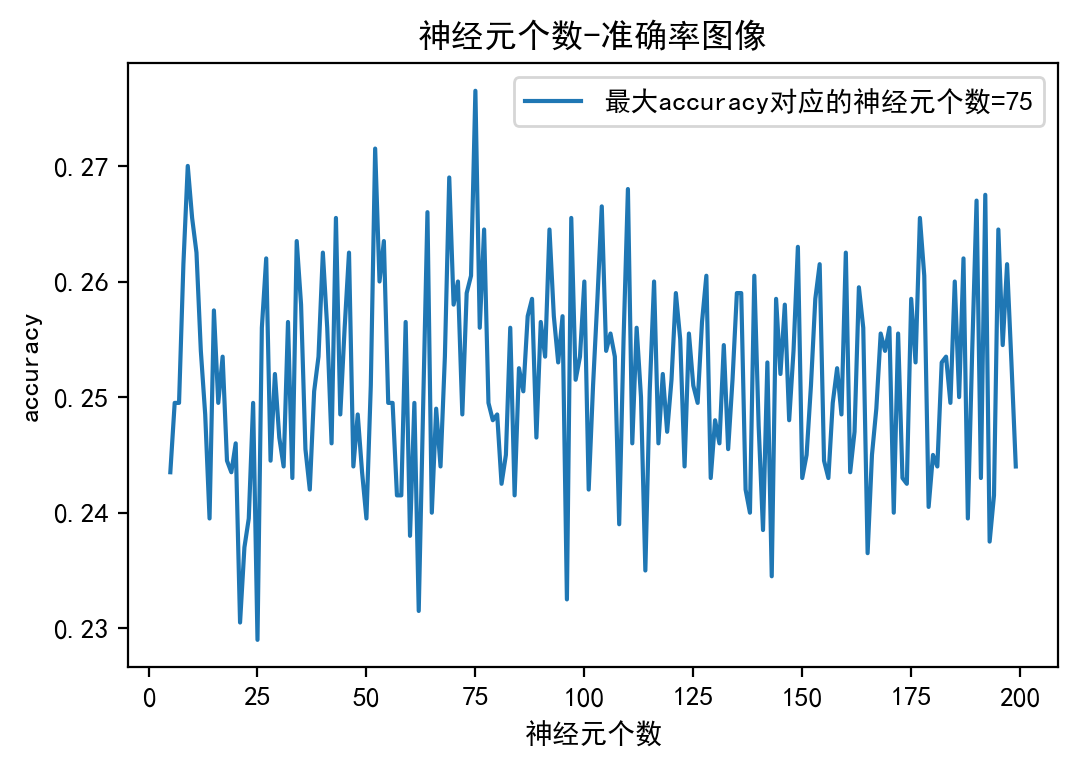

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc=[]

for i in range(5,200,1):
    mlp = MLPClassifier(solver='adam',activation='relu',hidden_layer_sizes=[i,], alpha=1e-5, max_iter=10000)
    mlp.fit(X_train, Y_train.flatten())
    Y_pred=mlp.predict(X_test)
    acc.append(mlp.score(X_test,Y_test.flatten()))
    print('神经元个数='+str(i),'accuracy=',accuracy_score(Y_test, Y_pred),'micro-F1=',f1_score(Y_test, Y_pred, average='micro'))
best_n=np.argmax(np.array(acc))+5
plt.figure(dpi=200)
plt.plot(list(range(5,200,1)),acc,label='最大accuracy对应的神经元个数='+str(best_n))
plt.xlabel('神经元个数')
plt.ylabel('accuracy')
plt.title("神经元个数-准确率图像")
plt.legend()
plt.show()

In [33]:
from sklearn.neural_network import MLPClassifier

acc=[]
micro=[]
for train_index, test_index in kf.split(x):
    X_train ,Y_train = data_train[train_index] ,data_train_label.values[train_index]
    X_test ,Y_test = data_train[test_index] ,data_train_label.values[test_index]
    mlp = MLPClassifier(solver='adam',activation='relu',hidden_layer_sizes=[75,], alpha=1e-5, verbose=True, max_iter=10000)
    mlp.fit(X_train, Y_train.flatten())
    Y_pred=mlp.predict(X_test)
    acc.append(mlp.score(X_test,Y_test.flatten()))
    micro.append(f1_score(Y_test, Y_pred, average='micro'))

print("神经网络")
print("5折交叉验证accuracy:",acc)
print("average accuracy:",np.array(acc).sum()/len(acc))
print("5折交叉验证micro-F1:",micro)
print("average micro-F1:",np.array(micro).sum()/len(micro))

Iteration 1, loss = 1.44062852
Iteration 2, loss = 1.40558369
Iteration 3, loss = 1.39287549
Iteration 4, loss = 1.38591498
Iteration 5, loss = 1.38258849
Iteration 6, loss = 1.38035544
Iteration 7, loss = 1.37896793
Iteration 8, loss = 1.37717764
Iteration 9, loss = 1.37557254
Iteration 10, loss = 1.37491502
Iteration 11, loss = 1.37352596
Iteration 12, loss = 1.37298614
Iteration 13, loss = 1.37228371
Iteration 14, loss = 1.37180962
Iteration 15, loss = 1.37201305
Iteration 16, loss = 1.37168817
Iteration 17, loss = 1.36983868
Iteration 18, loss = 1.36964402
Iteration 19, loss = 1.36900145
Iteration 20, loss = 1.36894326
Iteration 21, loss = 1.36817754
Iteration 22, loss = 1.36765350
Iteration 23, loss = 1.36745954
Iteration 24, loss = 1.36669923
Iteration 25, loss = 1.36639743
Iteration 26, loss = 1.36679134
Iteration 27, loss = 1.36566419
Iteration 28, loss = 1.36488013
Iteration 29, loss = 1.36438197
Iteration 30, loss = 1.36451562
Iteration 31, loss = 1.36386553
Iteration 32, los

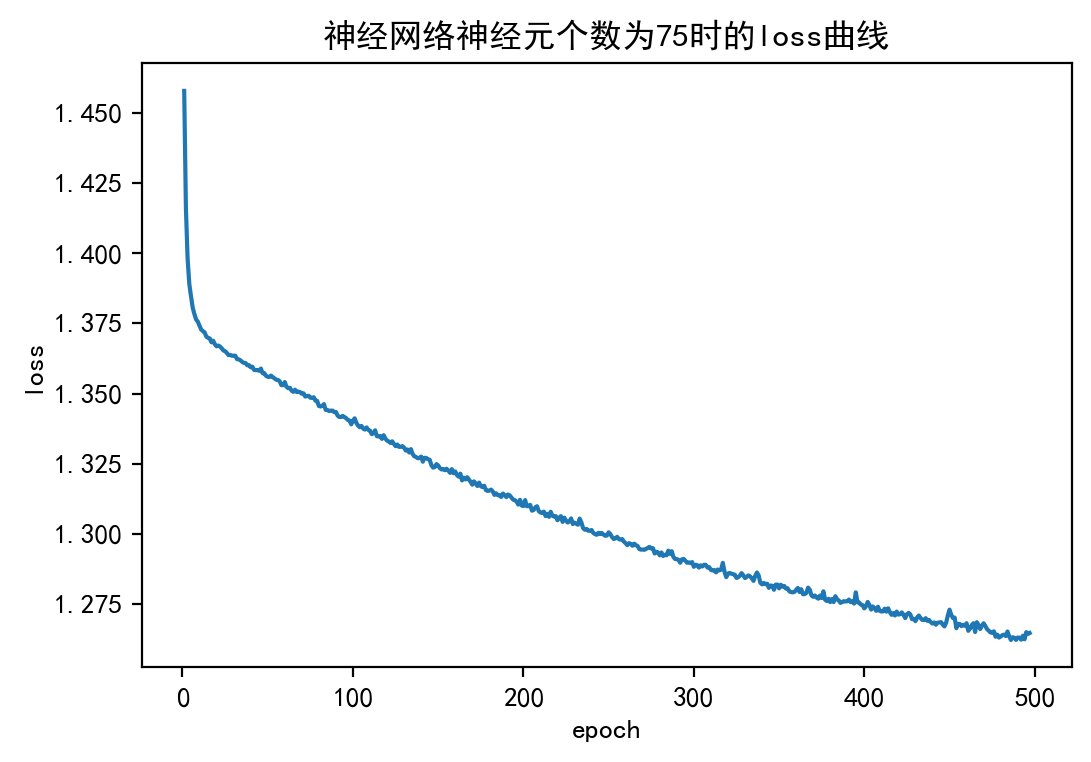

In [36]:
plt.figure(dpi=200)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('神经网络神经元个数为75时的loss曲线')
plt.plot(np.array(list(range(len(mlp.loss_curve_))))+1,mlp.loss_curve_)
plt.show()

保存模型

In [35]:
print(mlp.n_layers_)
print(mlp.n_iter_)
print(mlp.coefs_)

3
497
softmax
[array([[-0.78325707, -1.26897277,  0.59970395, ...,  1.43742193,
        -0.61487822, -0.26428893],
       [-1.57005411, -0.63782827,  0.09633798, ..., -0.01728671,
        -0.04114715,  0.00979091],
       [ 0.09587995,  0.09976807,  0.17579378, ...,  0.21842608,
         0.22138891, -0.26252676],
       ...,
       [ 0.02274422, -3.73104104, -0.01002045, ...,  0.02397947,
         0.03456737,  0.0398422 ],
       [ 1.08719062,  0.35441885, -0.11218447, ..., -0.4486332 ,
         0.88012344,  0.62789505],
       [ 1.7457859 , -2.07404354,  1.22382028, ..., -1.98285572,
        -0.12675498, -0.19413225]]), array([[-0.51154603, -0.03640515,  0.94741215, -0.50695622],
       [-0.0617945 ,  0.20641477, -0.73166365,  0.65572476],
       [ 0.8500903 , -0.07417944, -0.24418517, -0.01766878],
       [-0.4711179 , -0.45014776,  0.39806885,  0.53264502],
       [-0.5170539 ,  0.55268531, -0.11208164,  0.25146639],
       [-0.31485523,  0.26546888, -0.62720912,  0.45412838],
     

### XGBoost+决策树

使用的是基于分类树的XGBoost模型,可调参数有：
- max_depth：树最大深度，这里采取与之前决策树相同的最优深度：7
- n_estimators：树的个数
- gamma: 惩罚项系数，指定节点分裂所需的最小损失函数下降值。在节点分裂时，只有分裂后损失函数的值下降了，才会分裂这个节点。gamma指定了节点分裂所需的最小损失函数下降值。 这个参数的值越大，算法越保守。

下面现在 gamma为默认值的情况下对于n_estimators进行调整：

n_estimators=1 accuracy= 0.251 micro-F1= 0.251
n_estimators=2 accuracy= 0.248 micro-F1= 0.248
n_estimators=3 accuracy= 0.242 micro-F1= 0.242
n_estimators=4 accuracy= 0.248 micro-F1= 0.248
n_estimators=5 accuracy= 0.233 micro-F1= 0.233
n_estimators=6 accuracy= 0.248 micro-F1= 0.248
n_estimators=7 accuracy= 0.244 micro-F1= 0.244
n_estimators=8 accuracy= 0.2475 micro-F1= 0.2475
n_estimators=9 accuracy= 0.242 micro-F1= 0.242
n_estimators=10 accuracy= 0.2525 micro-F1= 0.2525
n_estimators=11 accuracy= 0.2465 micro-F1= 0.2465
n_estimators=12 accuracy= 0.2445 micro-F1= 0.2445
n_estimators=13 accuracy= 0.243 micro-F1= 0.243
n_estimators=14 accuracy= 0.244 micro-F1= 0.244
n_estimators=15 accuracy= 0.2505 micro-F1= 0.2505
n_estimators=16 accuracy= 0.2495 micro-F1= 0.2495
n_estimators=17 accuracy= 0.251 micro-F1= 0.251
n_estimators=18 accuracy= 0.252 micro-F1= 0.252
n_estimators=19 accuracy= 0.2535 micro-F1= 0.2535
n_estimators=20 accuracy= 0.251 micro-F1= 0.251
n_estimators=21 accuracy= 0.2565 mi

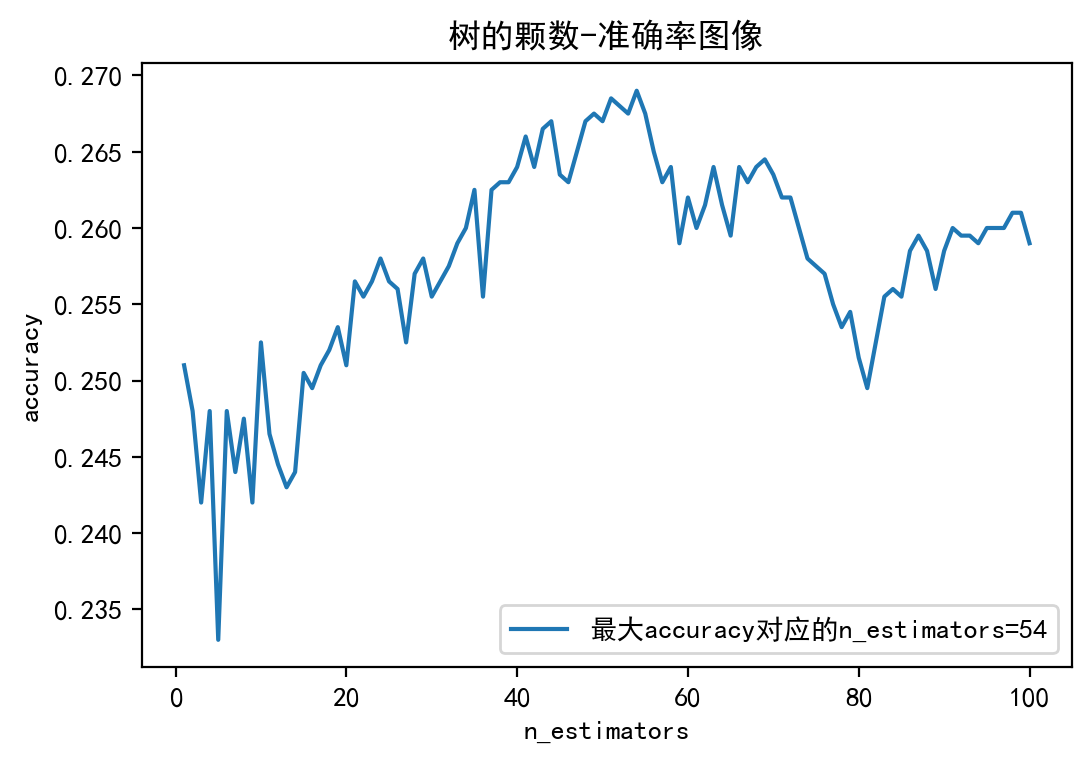

In [119]:
import xgboost as xgb

acc=[]
for i in range(1,101,1):
    xgb_model = xgb.XGBClassifier(max_depth=7,learning_rate=0.1,n_estimators=i,objective='multi:softmax')
    xgb_model.fit(X_train, Y_train.flatten())
    Y_pred=xgb_model.predict(X_test)
    acc.append(xgb_model.score(X_test,Y_test.flatten()))
    print('n_estimators='+str(i),'accuracy=',accuracy_score(Y_test, Y_pred),'micro-F1=',f1_score(Y_test, Y_pred, average='micro'))
best_n=np.argmax(np.array(acc))+1
plt.figure(dpi=200)
plt.plot(list(range(1,101,1)),acc,label='最大accuracy对应的n_estimators='+str(best_n))
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title("树的颗数-准确率图像")
plt.legend()
plt.show()

下面在n_estimators=54的情况下对gamma进行调整：

gamma=1e-06 accuracy= 0.269 micro-F1= 0.269
gamma=1e-05 accuracy= 0.269 micro-F1= 0.269
gamma=0.0001 accuracy= 0.269 micro-F1= 0.269
gamma=0.001 accuracy= 0.271 micro-F1= 0.271
gamma=0.01 accuracy= 0.258 micro-F1= 0.258
gamma=0.1 accuracy= 0.244 micro-F1= 0.244
gamma=1 accuracy= 0.25 micro-F1= 0.25
gamma=10.0 accuracy= 0.2555 micro-F1= 0.2555
gamma=100.0 accuracy= 0.2555 micro-F1= 0.2555
gamma=1000.0 accuracy= 0.2555 micro-F1= 0.2555
gamma=10000.0 accuracy= 0.2555 micro-F1= 0.2555
gamma=100000.0 accuracy= 0.2555 micro-F1= 0.2555


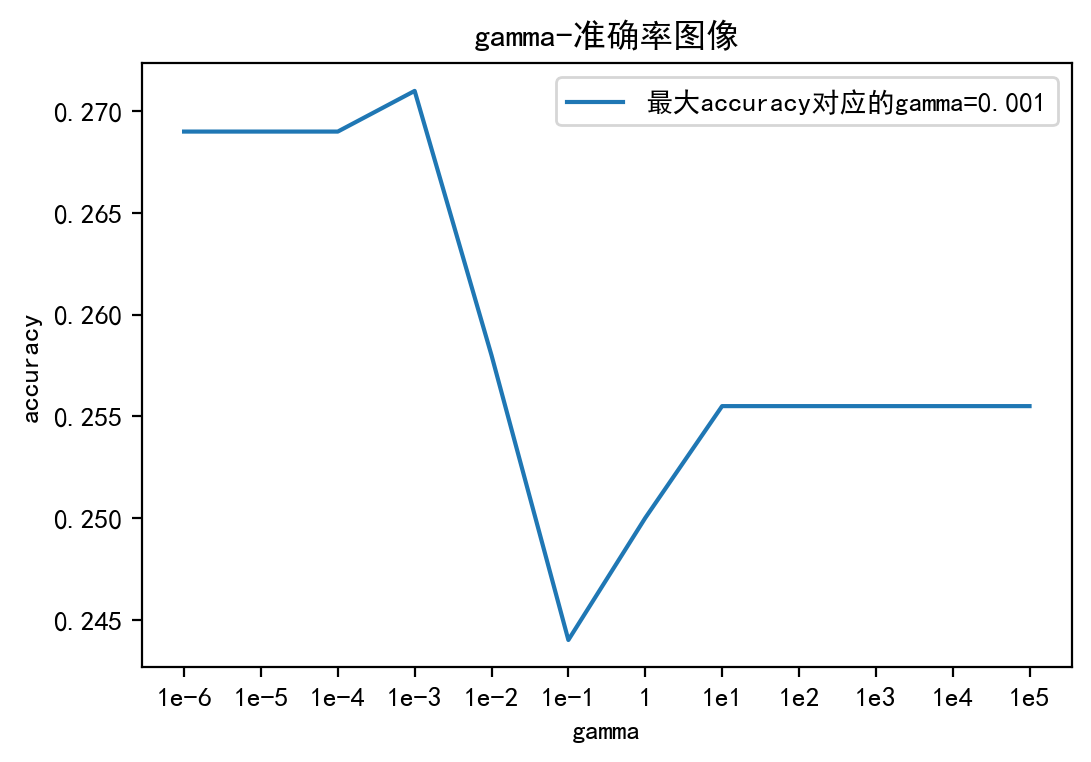

In [130]:
import xgboost as xgb

gammas=[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5]
acc=[]

for gamma in gammas:
    xgb_model = xgb.XGBClassifier(max_depth=7,learning_rate=0.1,n_estimators=54,gamma=gamma,objective='multi:softmax')
    xgb_model.fit(X_train, Y_train.flatten())
    Y_pred=xgb_model.predict(X_test)
    acc.append(xgb_model.score(X_test,Y_test.flatten()))
    print('gamma='+str(gamma),'accuracy=',accuracy_score(Y_test, Y_pred),'micro-F1=',f1_score(Y_test, Y_pred, average='micro'))
best_gamma=gammas[np.argmax(np.array(acc))]
X=[1,2,3,4,5,6,7,8,9,10,11,12]
X_labels=['1e-6','1e-5','1e-4','1e-3','1e-2','1e-1','1','1e1','1e2','1e3','1e4','1e5']
plt.figure(dpi=200)
plt.plot(X,acc,label='最大accuracy对应的gamma='+str(best_gamma))
plt.xticks(X,X_labels)
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title("gamma-准确率图像")
plt.legend()
plt.show()

In [140]:
import xgboost as xgb

acc=[]
micro=[]
for train_index, test_index in kf.split(x):
    X_train ,Y_train = data_train[train_index] ,data_train_label.values[train_index]
    X_test ,Y_test = data_train[test_index] ,data_train_label.values[test_index]
    xgb_model = xgb.XGBClassifier(max_depth=7,learning_rate=0.1,n_estimators=54,gamma=1e-3,objective='multi:softmax')
    xgb_model.fit(X_train, Y_train.flatten())
    Y_pred=xgb_model.predict(X_test)
    acc.append(xgb_model.score(X_test,Y_test.flatten()))
    micro.append(f1_score(Y_test, Y_pred, average='micro'))

print("XGBoost+决策树")
print("5折交叉验证accuracy:",acc)
print("average accuracy:",np.array(acc).sum()/len(acc))
print("5折交叉验证micro-F1:",micro)
print("average micro-F1:",np.array(micro).sum()/len(micro))

XGBoost+决策树
5折交叉验证accuracy: [0.26, 0.2555, 0.243, 0.2615, 0.253]
average accuracy: 0.25460000000000005
5折交叉验证micro-F1: [0.26, 0.2555, 0.243, 0.2615, 0.253]
average micro-F1: 0.25460000000000005


## 假设检验

在上面模型调参过后，现在我们来做假设检验来选出最好的模型。这里采用的是**Friedman检验与Nemenyi后续检验**。

In [98]:
from Model import *
from sklearn import tree
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from scipy.stats import friedmanchisquare


table=np.zeros([5,6]) # 序值表
fold=0 # 第几折
for train_index, test_index in kf.split(x):
    acc=[]
    X_train ,Y_train = data_train[train_index] ,data_train_label.values[train_index]
    X_test ,Y_test = data_train[test_index] ,data_train_label.values[test_index]

    # lr
    X_train0 = X_train[np.where(Y_train==0)[0]]
    X_train1 = X_train[np.where(Y_train==1)[0]]
    X_train2 = X_train[np.where(Y_train==2)[0]]
    X_train3 = X_train[np.where(Y_train==3)[0]]
    X_Train = [X_train0,X_train1,X_train2,X_train3]
    OvO={'0':[0,1],'1':[0,2],'2':[0,3],'3':[1,2],'4':[1,3],'5':[2,3]}

    lrs=[]
    for i in range(len(X_Train)):
        for j in range(i+1,len(X_Train),1):
            lr=LogisticRegression(gamma=5)
            lr.fit(np.concatenate([X_Train[i],X_Train[j]]),np.mat(np.concatenate([np.zeros([len(X_Train[i]),1]),np.ones([len(X_Train[j]),1])])),lr=1)
            lrs.append(lr)

    Pred=np.zeros([len(X_test),len(lrs)],dtype=int)
    for i in range(len(lrs)):
        pred=lrs[i].predict(X_test).astype(int)
        for j in range(len(pred)):
            Pred[j][i]=OvO[str(i)][pred[j][0]]

    Y_pred = []
    for i in range(len(Pred)):
        Y_pred.append(np.argmax(np.bincount(Pred[i]))) # 投票法
    acc.append(accuracy_score(Y_test,Y_pred))

    # svm1
    svm1s=[]
    for i in range(len(X_Train)):
        for j in range(i+1,len(X_Train),1):
            svm1=SVM1(dim=X_train.shape,C=0.001)
            svm1.fit(np.concatenate([X_Train[i],X_Train[j]]),np.concatenate([np.zeros([len(X_Train[i]),1])-1,np.ones([len(X_Train[j]),1])]),max_iter=50)
            svm1s.append(svm1)
            
    Pred=np.zeros([len(X_test),len(svm1s)],dtype=int)
    for i in range(len(svm1s)):
        pred=svm1s[i].predict(X_test).astype(int)
        for k in range(len(pred)):
            if pred[k]==-1:
                pred[k]=0
        
        for j in range(len(pred)):
            Pred[j][i]=OvO[str(i)][pred[j][0]]

    Y_pred = []
    for i in range(len(Pred)):
        Y_pred.append(np.argmax(np.bincount(Pred[i]))) # 投票法
    acc.append(accuracy_score(Y_test,Y_pred))

    # svm2
    svm2s=[]
    for i in range(len(X_Train)):
        for j in range(i+1,len(X_Train),1):
            svm2=SVM2(dim=X_train.shape,C=1)
            svm2.fit(np.concatenate([X_Train[i],X_Train[j]]),np.concatenate([np.zeros([len(X_Train[i]),1])-1,np.ones([len(X_Train[j]),1])]),max_iter=1e5)
            svm2s.append(svm2)
            
    Pred=np.zeros([len(X_test),len(svm2s)],dtype=int)
    for i in range(len(svm2s)):
        pred=svm2s[i].predict(X_test).astype(int)
        for k in range(len(pred)):
            if pred[k]==-1:
                pred[k]=0
        
        for j in range(len(pred)):
            Pred[j][i]=OvO[str(i)][pred[j]]

    Y_pred = []
    for i in range(len(Pred)):
        Y_pred.append(np.argmax(np.bincount(Pred[i]))) # 投票法
    acc.append(accuracy_score(Y_test,Y_pred))

    # decision tree
    tree_model = tree.DecisionTreeClassifier(criterion='gini', 
                                            max_depth=7,
                                            min_samples_leaf=0.01)
    tree_model.fit(X_train, Y_train.flatten())
    Y_pred=tree_model.predict(X_test)
    acc.append(tree_model.score(X_test,Y_test.flatten()))
    
    # 神经网络
    mlp = MLPClassifier(solver='adam',activation='relu',hidden_layer_sizes=[75,], alpha=1e-5, max_iter=10000)
    mlp.fit(X_train, Y_train.flatten())
    Y_pred=mlp.predict(X_test)
    acc.append(mlp.score(X_test,Y_test.flatten()))

    # XGBoost+决策树
    xgb_model = xgb.XGBClassifier(max_depth=7,learning_rate=0.1,n_estimators=54,gamma=1e-3,objective='multi:softmax')
    xgb_model.fit(X_train, Y_train.flatten())
    Y_pred=xgb_model.predict(X_test)
    acc.append(xgb_model.score(X_test,Y_test.flatten()))

    index=np.argsort(-np.array(acc))
    for i in range(len(acc)):
        table[fold,i]=index[i]+1
    fold+=1

In [99]:
table

array([[4., 5., 1., 6., 3., 2.],
       [1., 4., 3., 5., 6., 2.],
       [4., 2., 6., 1., 5., 3.],
       [6., 5., 3., 1., 4., 2.],
       [2., 3., 4., 6., 5., 1.]])

In [102]:
# 平均序值
mean=[]
for i in range(6):
    mean.append(np.mean(table[:,i]))
mean

[3.4, 3.8, 3.4, 3.8, 4.6, 2.0]

In [103]:
import numpy as np
import matplotlib.pyplot as plt
 
 
def Friedman(n, k, data_matrix):
    '''
    Friedman 检验
    :param n:数据集个数
    :param k: 算法种数
    :param data_matrix:排序矩阵
    :return:T1
    '''
 
    # 计算每个算法的平均序值
    row, col = data_matrix.shape  # 获取矩阵的行和列
    xuzhi_mean = list()
    for i in range(col):  # 计算平均序值
        xuzhi_mean.append(data_matrix[:, i].mean())
    sum_mean = np.array(xuzhi_mean)
 
    sum_ri2_mean = (sum_mean ** 2).sum()  # 整个矩阵内的元素逐个平方后，得到的值相加起来
    result_Tx2 = (12 * n) * (sum_ri2_mean - ((k * ((k + 1) ** 2)) / 4)) / (k * (k + 1))  # P42页的公式
    result_Tf = (n - 1) * result_Tx2 / (n * (k - 1) - result_Tx2)  # P42页的公式
    return result_Tf
 
 
def nemenyi(n, k, q):
    '''
    Nemenyi 后续检验
    :param n:数据集个数
    :param k:算法种数
    :param q:直接查书上2.7的表
    :return:
    '''
    cd = q * (np.sqrt((k * (k + 1) / (6 * n))))
    return cd
 
print('Friedman',Friedman(5,6,table))
print('Nemenyi',nemenyi(5,6,2.589))

Friedman 1.0578034682080912
Nemenyi 3.0633461116889813


## 预测

先对待预测的数据集做同样的处理

In [128]:
data_test_feature.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
count,2989.000000,2978.000000,2986.000000,2993.000000,2982.000000,2.988000e+03,2978.000000,2985.000000,2985.000000,2985.000000,...,2986.000000,2985.000000,2985.000000,2983.000000,2980.000000,2993.000000,2987.000000,2985.000000,2996.000000,2979.000000
mean,1762.320843,91.910842,15.729200,265.862011,96.420188,4.984848e+03,1703.073875,255.758459,73.217755,109.578258,...,115.841929,27.497801,1803.299832,12.129278,107.063090,50.088206,1985.888517,27.980523,62.420561,944.504196
std,25164.050301,4582.805525,264.728244,3581.427976,1620.836020,7.474121e+04,24267.788219,3327.352630,1314.130579,3029.658060,...,1792.757550,506.795832,24097.582713,242.431163,2003.964082,949.080473,27385.255539,563.666700,1119.402869,17134.678008
min,31.000000,-120240.098513,0.001354,3.000000,0.000000,0.000000e+00,30.000000,3.000000,1.000000,0.080055,...,0.000000,0.000337,27.000000,0.000986,0.094384,0.000000,30.000000,0.000621,0.000000,29.000000
25%,45.000000,-5.573117,0.254053,7.000000,3.000000,1.630000e+02,45.000000,7.000000,1.000000,1.361981,...,3.000000,0.306820,45.000000,0.246353,1.362477,1.000000,45.000000,0.294963,1.000000,45.000000
50%,50.000000,-0.108952,0.493951,8.000000,4.000000,1.930000e+02,50.000000,7.000000,2.000000,2.667552,...,4.000000,0.731886,50.000000,0.505224,2.621662,2.000000,50.000000,0.695484,2.000000,50.000000
75%,55.000000,5.182033,0.758512,8.000000,5.000000,2.220000e+02,55.000000,8.000000,4.000000,5.384259,...,5.000000,1.435252,55.000000,0.762781,5.092616,3.000000,55.000000,1.351889,3.000000,55.000000
max,601705.000000,113501.350205,9410.525787,82062.000000,37962.000000,1.743624e+06,460649.000000,69288.000000,45012.000000,118302.525010,...,49145.000000,16151.345522,450447.000000,8052.890204,66482.684419,28296.000000,543368.000000,18821.493399,32106.000000,484071.000000


In [129]:
# 异常值处理
df_zscore=data_test_feature.copy()
cols=data_test_feature.columns
for col in cols:
    df_col = data_test_feature[col]
    z_score = (df_col - df_col.mean()) / df_col.std()
    df_zscore[col] = z_score.abs() > 2 # 选择2sigma以外的作为离群点 数值分布在该范围内的概率为0.9545
for col in cols:
    for i in range(len(df_zscore[col])):
        if df_zscore[col][i] == True:
            data_test_feature.loc[i,col] = np.nan

# 缺失值处理
data_test_feature.fillna(data_test_feature.mean(),inplace=True)

# 标准化
cols=data_test_feature.columns
for col in cols:
    df_col = data_test_feature[col]
    z_score = (df_col - df_col.mean()) / df_col.std()
    data_test_feature[col] = z_score

# 特征选择
data_test_feature.drop(columns=['feature_69','feature_73','feature_84','feature_92'],inplace=True)
data_test_feature = data_test_feature.values[:,cols_index]

In [131]:
xgb_model = xgb.XGBClassifier(max_depth=7,learning_rate=0.1,n_estimators=54,gamma=1e-3,objective='multi:softmax')
xgb_model.fit(data_train, data_train_label.values.flatten())
Y_pred=xgb_model.predict(data_test_feature)
test_label = pd.DataFrame(data=Y_pred,columns=['label'])
test_label

,label
0,0
1,0
2,1
3,0
4,0
...,...
2995,0
2996,0
2997,2
2998,1


输出预测值

In [135]:
test_label.to_csv('test_label.csv',index=False)